My Questions:

Questions that helped me select My Dataset:

Data Wrangling Questions:

Exploratory Data Analysis Questions:

The Answers

1. What value can Machine Learning add to my work?

The Transactions Dataset

In [4]:
import pandas as pd

In [5]:
transactions = pd.read_excel('transactions.xlsx')

In [6]:
transactions.head()

,Transaction Number,Origin No.,Posting Date,Due Date,Month-YY,BP Code,BP Name,Sales Employee Name,Item No.,Item Description,...,Product Category,Selling Price,Actual Quantity Sold,Sales Value,Doc. Type,Region,Channel,Payment Terms,Gross Profit,Week
0,481205,53133,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102009,Chairs - Easy - White,...,Furniture,20640.403,50.0,1032020.15,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,403820.15,Wk5
1,480662,53129,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102012,Chairs - Easy - Green,...,Furniture,20640.403,2.0,41280.81,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,16152.81,Wk5
2,480662,53129,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102014,Chairs - Easy - Grey,...,Furniture,20640.403,2.0,41280.81,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,16152.81,Wk5
3,480662,53129,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102070,Chairs - Easy - Clip cap blue,...,Furniture,20640.403,2.0,41280.81,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,16152.81,Wk5
4,480662,53129,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102079,Chairs - Easy - Purple,...,Furniture,20640.403,2.0,41280.81,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,16152.81,Wk5


2. Is the data clean?

In [7]:
def validateDatatype():    
    myStrings = ['Transaction Number','BP Code','BP Name','Sales Employee Name','Item No.','Item Description','Item Subcategory','Product Category','Region','Channel']
    myDates = ['Posting Date']
    myNumbers = ['Selling Price','Actual Quantity Sold','Sales Value','Gross Profit']
    
    # Validate data types
    foundError = False
    for index, row in transactions.iterrows():
        for field in myStrings:
            if not isinstance(row[field], str):
                print(f"Error: {field} in row {index} should be a string, but is {type(row[field])}")
                foundError = True
                break
    
        for field in myDates:
            try:
                pd.to_datetime(row[field])
            except ValueError:
                print(f"Error: {field} in row {index} should be a date, but is invalid")
                foundError = True
                break
    
        for field in myNumbers:
            try:
                float(row[field])
            except ValueError:
                print(f"Error: {field} in row {index} should be a number, but is {row[field]}")
                foundError = True
                break
        if(foundError):
            break
    if(not foundError):
        print("None")

validateDatatype()

Error: Transaction Number in row 0 should be a string, but is <class 'int'>


In [8]:
transactions['Transaction Number'] = transactions['Transaction Number'].astype(str)

#lets test again
validateDatatype()

Error: Product Category in row 7 should be a string, but is <class 'int'>


In [9]:
transactions['Product Category'] = transactions['Product Category'].astype(str)
#lets test again
validateDatatype()

None


In [10]:
if transactions['BP Code'].str.contains(r'^\s|\s$', regex=True).any():
    print("Spaces found!")
else:
    print("None")

None


In [11]:
if transactions['BP Name'].str.contains(r'^\s|\s$', regex=True).any():
    print("Spaces found!")
else:
    print("None")

None


In [12]:
if transactions['Sales Employee Name'].str.contains(r'^\s|\s$', regex=True).any():
    print("Extra spaces found!")
else:
    print("None")

None


In [13]:
if transactions['Item No.'].str.contains(r'^\s|\s$', regex=True).any():
    print("Spaces found!")
else:
    print("None")

None


In [14]:
if transactions['Item Description'].str.contains(r'^\s|\s$', regex=True).any():
    print("Spaces found!")
else:
    print("None")

None


In [15]:
if transactions['Item Subcategory'].str.contains(r'^\s|\s$', regex=True).any():
    print("Spaces found!")
else:
    print("None")

None


In [16]:
if transactions['Product Category'].str.contains(r'^\s|\s$', regex=True).any():
    print("Spaces found!")
else:
    print("None")

None


In [17]:
if transactions['Region'].str.contains(r'^\s|\s$', regex=True).any():
    print("Spaces found!")
else:
    print("None")

None


In [18]:
if transactions['Channel'].str.contains(r'^\s|\s$', regex=True).any():
    print("Spaces found!")
else:
    print("None")

None


In [19]:
def checkEmpty():    
    myStrings = ['Transaction Number','BP Code','BP Name','Sales Employee Name','Item No.','Item Description','Item Subcategory','Product Category','Region','Channel']
    myDates = ['Posting Date']
    myNumbers = ['Selling Price','Actual Quantity Sold','Sales Value','Gross Profit']

    foundError = False
    for text in myStrings:
        if transactions[text].isnull().any() or transactions[text].eq("").any():
            print("Empty string found!")
            foundError = True
            break

    for text in myDates:
        if transactions[text].isnull().any() or transactions[text].eq("").any():
            print("Empty date found!")
            foundError = True
            break

    for text in myNumbers:
        if transactions[text].isnull().any() or transactions[text].eq("").any():
            print("Empty date found!")
            foundError = True
            break

    if(not foundError):
        print("None")
checkEmpty()


None


In [20]:
duplicates = transactions[transactions.duplicated()]

# Display the duplicates
print(duplicates)

     Transaction Number  Origin No. Posting Date             Due Date  \
363              368981       42119   2023-10-03  2023-03-10 00:00:00   
399              368890       42108   2023-09-03  2023-03-09 00:00:00   
1987             479952       53056   2024-01-30             30/01/24   
2199             472342       52292   2024-01-06             06/01/24   
2322             470990       52241   2024-01-03             03/01/24   
2489             369573       42188   2023-11-03  2023-03-11 00:00:00   
2523             369568       42184   2023-11-03  2023-03-11 00:00:00   
3238             366979       41934   2023-03-03  2023-03-03 00:00:00   
3297             366861       41916   2023-03-03  2023-03-03 00:00:00   
4122             357905       41074   2023-08-02  2023-02-08 00:00:00   
4187             357510       41051   2023-07-02  2023-02-07 00:00:00   
4188             357510       41051   2023-07-02  2023-02-07 00:00:00   
4189             357510       41051   2023-07-02  2

In [21]:
#dropping the duplicates
transactions = transactions.drop_duplicates()

#check for duplicates again
duplicates = transactions[transactions.duplicated()]

# Display the duplicates
print(duplicates)

Empty DataFrame
Columns: [Transaction Number, Origin No., Posting Date, Due Date, Month-YY, BP Code, BP Name, Sales Employee Name, Item No., Item Description, Item Subcategory, Product Category, Selling Price, Actual Quantity Sold, Sales Value, Doc. Type, Region, Channel, Payment Terms, Gross Profit, Week]
Index: []

[0 rows x 21 columns]


In [22]:
transactions = transactions.replace('', pd.NA).fillna('Not specified')
transactions = transactions.replace('nan', pd.NA).fillna('Not specified')

In [23]:
transactions['BP Name'].unique()

array(['UBL OUTLET - RETAIL', 'JANINE SERVICES LTD',
       'BASE 1 OUTLET - RETAIL', 'BASE 1 OUTLET - WHOLESALE',
       'UBL OUTLET - WHOLESALE', 'NAKASERO HOSPITAL LIMITED',
       'CIVTEC AFRICA LIMITED', 'FACTORY OUTLET CASH SALES',
       'NHOP STAFF MEMBERS', 'FLOCKLINE CONSULTS LIMITED',
       'HAN & IVA SOUVENIR DOGS LIMITED', 'TERRAIN SERVICES LIMITED',
       'CASH SALES WHOLESALE', 'CREATIVE DIRECTORS',
       'KOOKEE ENTERPRISES LIMITED', 'MISS EPHRANCE NAMATUNGO',
       'SILLAH LIMITED', 'FENIX INTERNATIONAL UGANDA LIMITED',
       'LEADCOM UGANDA LIMITED', 'INDIGO HOSPITALITY LIMITED',
       'BEST CERAMICS UGANDA LIMITED', 'INPUTI LTD',
       'NILE BREWERIES LIMITED', 'COCA-COLA BEVERAGES UGANDA LIMITED',
       'MS KATE TUSIIME', 'RONAM INTERNATIONAL LIMITED',
       'Mr. ALEX MUHUMUZA', 'Mr. ELIOD KANSIIME',
       'VESOM PLASTICS AND GENERAL MERCHANDISE SMC LIMITED',
       'MEWA DUCU ENTERPRISES LIMITED', 'EQUIPCARE INVESTMENTS LTD',
       'ANTHERBETH ENTERPRISE

In [24]:
transactions['Sales Employee Name'].unique()

array(['Mercy Zalwango', '-No Sales Employee-', 'Patricia Nakato',
       'Kibirango Tonny', 'Sheilla Atuhaire', 'Nina Namatovu',
       'Ronald Musiriki', 'Herbert Musinguzi', 'Namutebi Phiona',
       'Esiat Emmaneal', 'Esiat Emmanuel', 'Mirembe Harriet',
       'Moses Wamono', 'Amon Namanya', 'Lwanga Harriet', 'Nankya Lilian',
       'Wandera Rogers', 'Tony Kutosi', 'Ninsiima Anitah',
       'Athieno Juliet Constance', 'Edwin Buhire', 'Jackline Nantaba',
       'Kyomuhangi Alice', 'Alice Kyomuhangi', 'Doreen Baraba'],
      dtype=object)

In [25]:
transactions['Product Category'].unique()

array(['Furniture', 'Tableware', 'Buckets', '0', 'Dental', 'Basins',
       'Packaging J/Cans', 'Packaging Crates', 'Packaging Bottles',
       'Writing Instruments', 'Packaging Buckets', 'Agriculture',
       'Baskets', 'Not specified', 'SATO Products', 'Trading Items',
       'Printing', 'Packaging -Film', 'Battery Components'], dtype=object)

In [26]:
#replace the '0' with 'Not specified'
transactions['Product Category'] = transactions['Product Category'].replace('0', 'Not specified')
transactions['Product Category'].unique()

array(['Furniture', 'Tableware', 'Buckets', 'Not specified', 'Dental',
       'Basins', 'Packaging J/Cans', 'Packaging Crates',
       'Packaging Bottles', 'Writing Instruments', 'Packaging Buckets',
       'Agriculture', 'Baskets', 'SATO Products', 'Trading Items',
       'Printing', 'Packaging -Film', 'Battery Components'], dtype=object)

In [27]:
transactions['Region'].unique()

array(['BUGOLOBI WALKINS', 'CRATES', 'MID-WEST', 'SOUTH CENTRAL',
       'SOUTH WEST', 'NORTH CENTRAL', 'NORTHERN', 'EASTERN', 'WEST NILE',
       'EXPORT', 'INSTITUTION', 'UMA WALKINS', 'Related Parties',
       'SUPERMARKETS'], dtype=object)

In [28]:
transactions['Channel'].unique()

array(['BUGOLOBI WALKINS', 'CRATES', 'DISTRIBUTION', 'EXPORT',
       'INSTITUTION', 'JeNi', 'RELATED PARTIES', 'SUPERMARKETS',
       'UMA Walkins'], dtype=object)

In [29]:
#Export clean data to an Excel file
transactions.to_excel('cleaned_data.xlsx', index=False)

2. Is the data clean?

3. What products are most selling? (Rationale: to know what products to produce more of)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

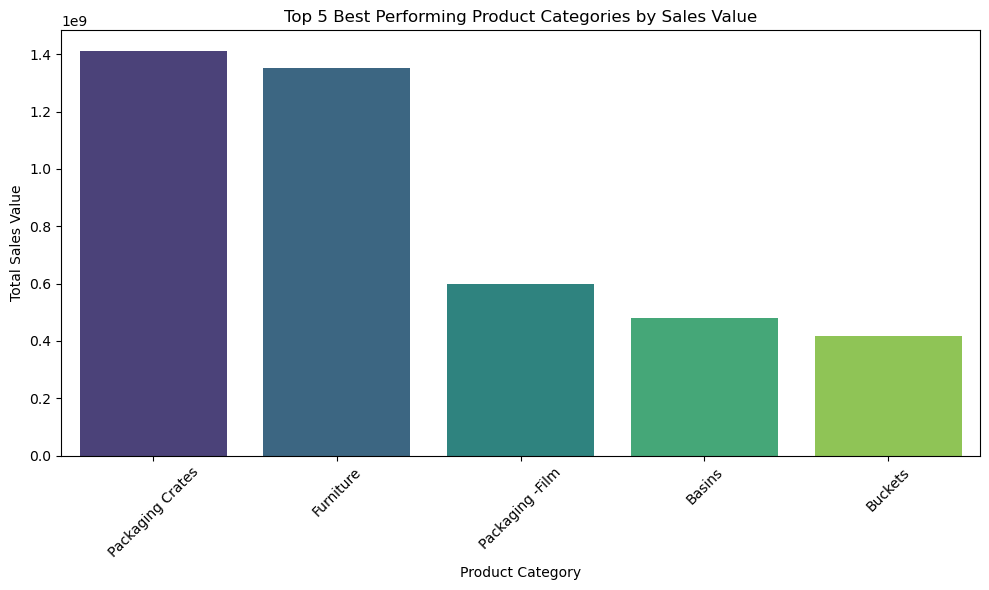

In [36]:
# Sort by sales value and select the top 5 product categories
product_sales = transactions.groupby('Product Category')['Sales Value'].sum().reset_index()

# Sort the product categories by total sales value and select the top 5
top_5_products = product_sales.nlargest(5, 'Sales Value')

# Plotting the top 5 products
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Sales Value', data=top_5_products, palette='viridis')
plt.title('Top 5 Best Performing Product Categories by Sales Value')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

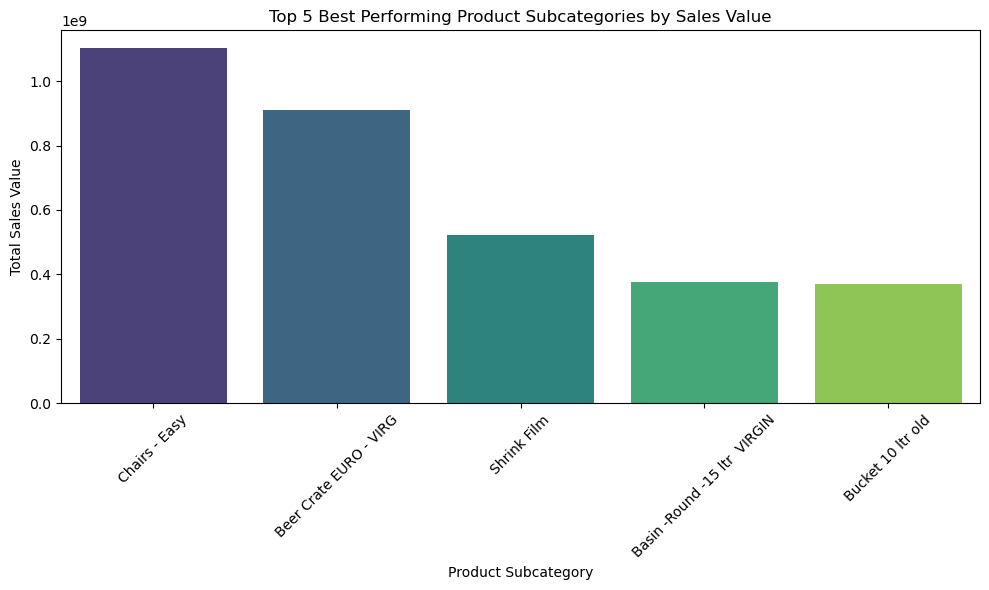

In [39]:
# Sort by sales value and select the top 5 product categories
product_sales = transactions.groupby('Item Subcategory')['Sales Value'].sum().reset_index()

# Sort the product categories by total sales value and select the top 5
top_5_products = product_sales.nlargest(5, 'Sales Value')

# Plotting the top 5 products
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Subcategory', y='Sales Value', data=top_5_products, palette='viridis')
plt.title('Top 5 Best Performing Product Subcategories by Sales Value')
plt.xlabel('Product Subcategory')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

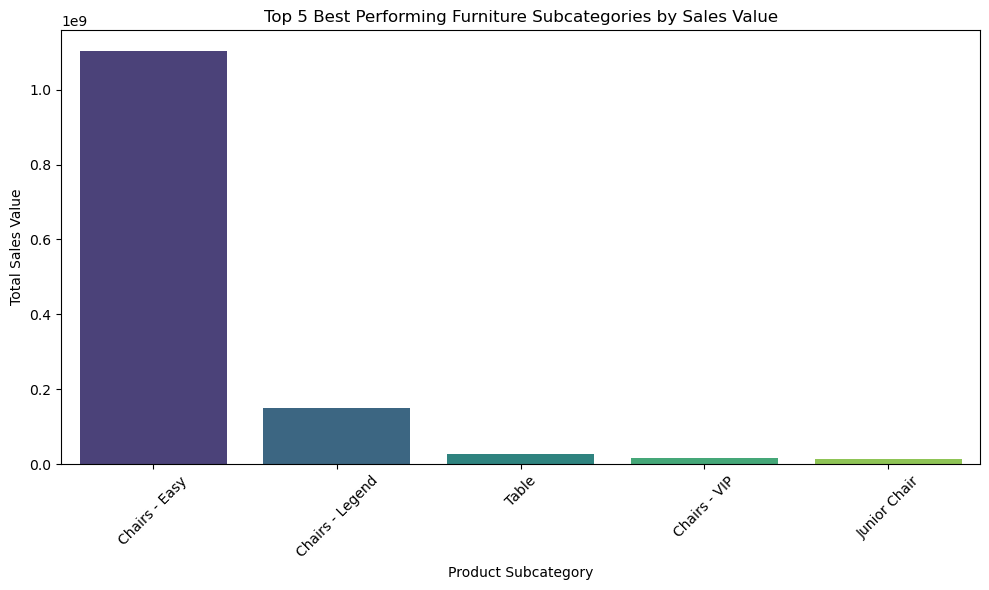

In [43]:
# Step 1: Filter out rows where the product category is "Furniture"
filtered_df = transactions[transactions['Product Category'] == 'Furniture']

# Step 2: Group by subcategory and sum the sales_value
subcategory_sales = filtered_df.groupby('Item Subcategory')['Sales Value'].sum().reset_index()

# Step 3: Sort by sales_value and select the top 5 subcategories
top_5_subcategories = subcategory_sales.nlargest(5, 'Sales Value')

# Step 4: Plotting the top 5 subcategories
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Subcategory', y='Sales Value', data=top_5_subcategories, palette='viridis')
plt.title('Top 5 Best Performing Furniture Subcategories by Sales Value')
plt.xlabel('Product Subcategory')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

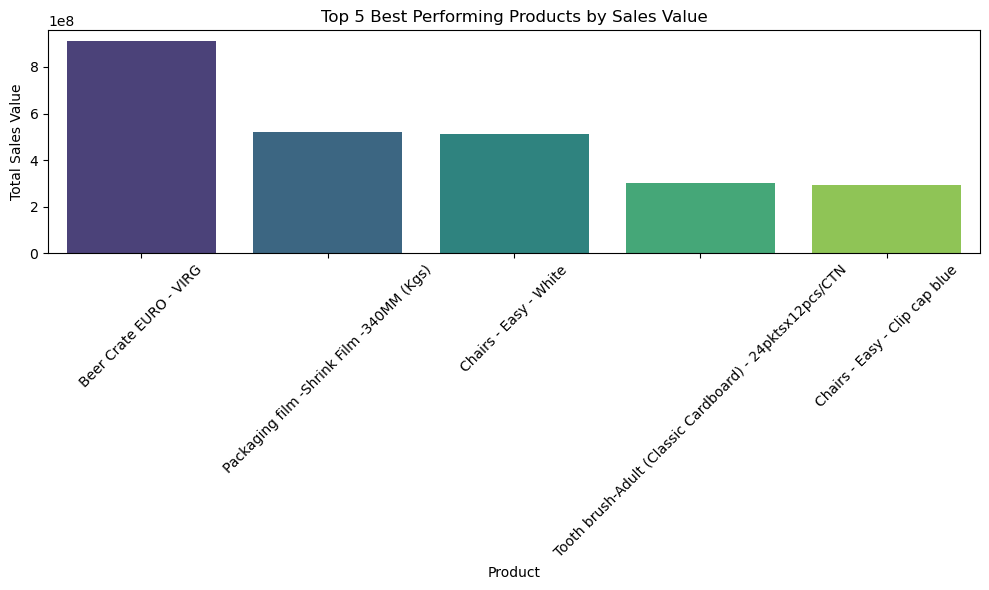

In [38]:
# Sort by sales value and select the top 5 product categories
product_sales = transactions.groupby('Item Description')['Sales Value'].sum().reset_index()

# Sort the product categories by total sales value and select the top 5
top_5_products = product_sales.nlargest(5, 'Sales Value')

# Plotting the top 5 products
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Description', y='Sales Value', data=top_5_products, palette='viridis')
plt.title('Top 5 Best Performing Products by Sales Value')
plt.xlabel('Product')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
#top 20 selling products
product_sales = transactions.groupby(['Item Description', 'Item Subcategory', 'Product Category'])['Sales Value'].sum().reset_index()

# Sort the products by sales_value and select the top 20
top_products = product_sales.nlargest(20, 'Sales Value')
top_products

,Item Description,Item Subcategory,Product Category,Sales Value
84,Beer Crate EURO - VIRG,Beer Crate EURO - VIRG,Packaging Crates,9.116641e+08
371,Packaging film -Shrink Film -340MM (Kgs),Shrink Film,Packaging -Film,5.217466e+08
229,Chairs - Easy - White,Chairs - Easy,Furniture,5.116637e+08
400,Tooth brush-Adult (Classic Cardboard) - 24pkts...,Classic Toothbrushes,Dental,3.004925e+08
215,Chairs - Easy - Clip cap blue,Chairs - Easy,Furniture,2.938464e+08
268,Crate - 300ml VIRGIN - Red,Crate - 300ml VIRGIN - Coke,Packaging Crates,2.801845e+08
414,UHT Milk 500ML TETRA FINO,UHT Milk,Trading Items,2.131967e+08
333,Jerry Cans-20 ltr 750gms - Yellow,Jerry Cans-20 ltr 75gms,Packaging J/Cans,1.591797e+08
369,Packaging film - milk - 500ml,Milk Film,Not specified,1.356318e+08
109,Bucket 10 ltr - Green,Bucket 10 ltr old,Buckets,1.152324e+08


3. What products are most selling? (Rationale: to know what products to produce more of)

4. What are the best performing regions? (Rationale: to know what regions to send more products to)

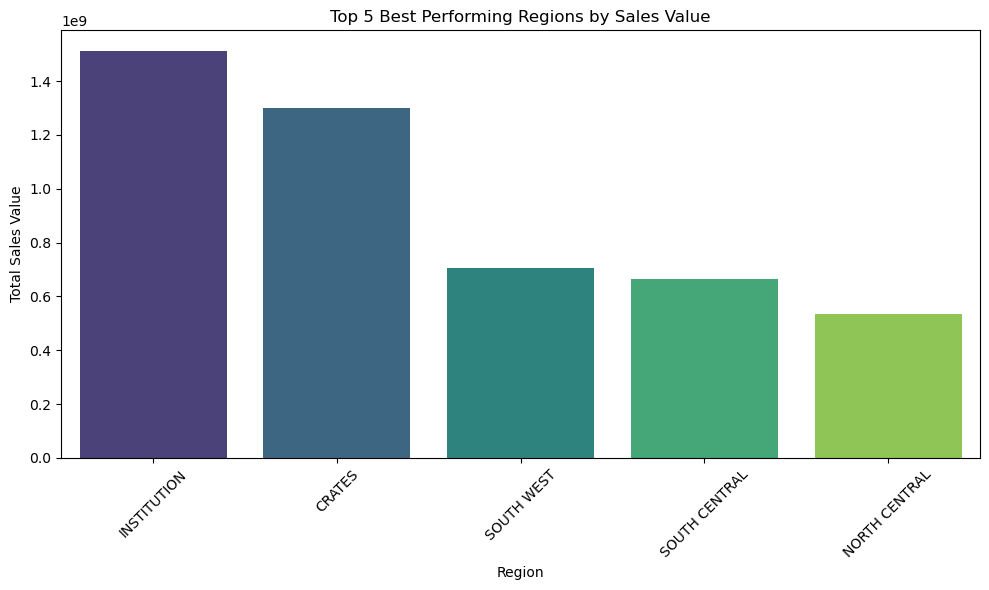

In [49]:
# Sort by sales value and select the top 5 regions - (some channels are regions as well)
product_sales = transactions.groupby('Region')['Sales Value'].sum().reset_index()

# Sort the regions by total sales value and select the top 5
top_5_products = product_sales.nlargest(5, 'Sales Value')

# Plotting the top 5 regions
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales Value', data=top_5_products, palette='viridis')
plt.title('Top 5 Best Performing Regions by Sales Value')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

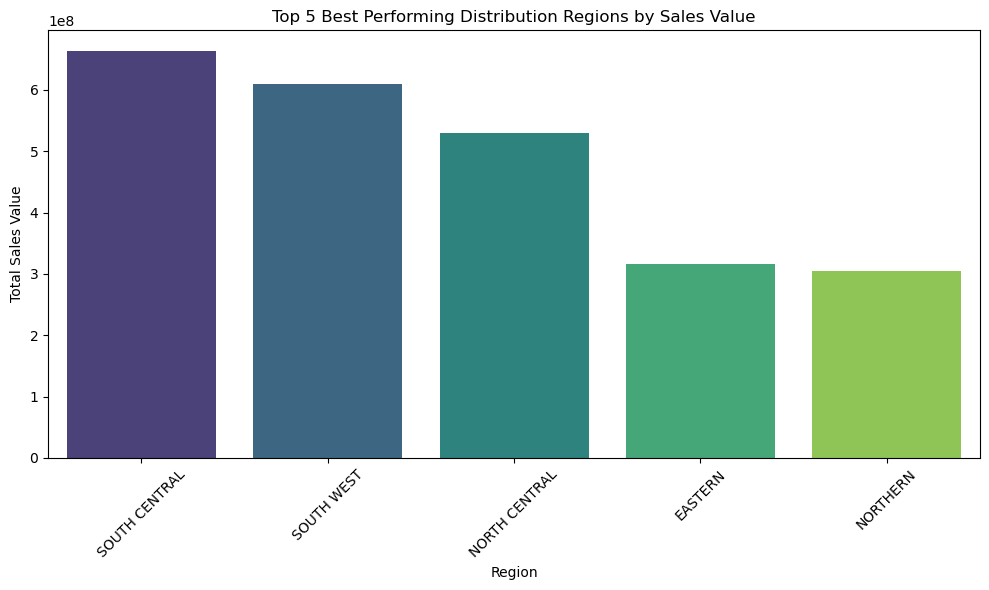

In [51]:
# Filter out rows where the channel is "Distribution" - Distribution has the proper regions since non distribution regions are majorly channels
filtered_df = transactions[transactions['Channel'] == 'DISTRIBUTION']

# Group by Region and sum the sales_value
regions_sales = filtered_df.groupby('Region')['Sales Value'].sum().reset_index()

# Sort by sales_value and select the top 5 regions
top_5_regions = regions_sales.nlargest(5, 'Sales Value')

# Step 4: Plotting the top 5 subcategories
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales Value', data=top_5_regions, palette='viridis')
plt.title('Top 5 Best Performing Distribution Regions by Sales Value')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

4. What are the best performing regions? (Rationale: to know what regions to send more products to)

5. What are the best performing Channels? (Rationale: to know which channel to more send products through)

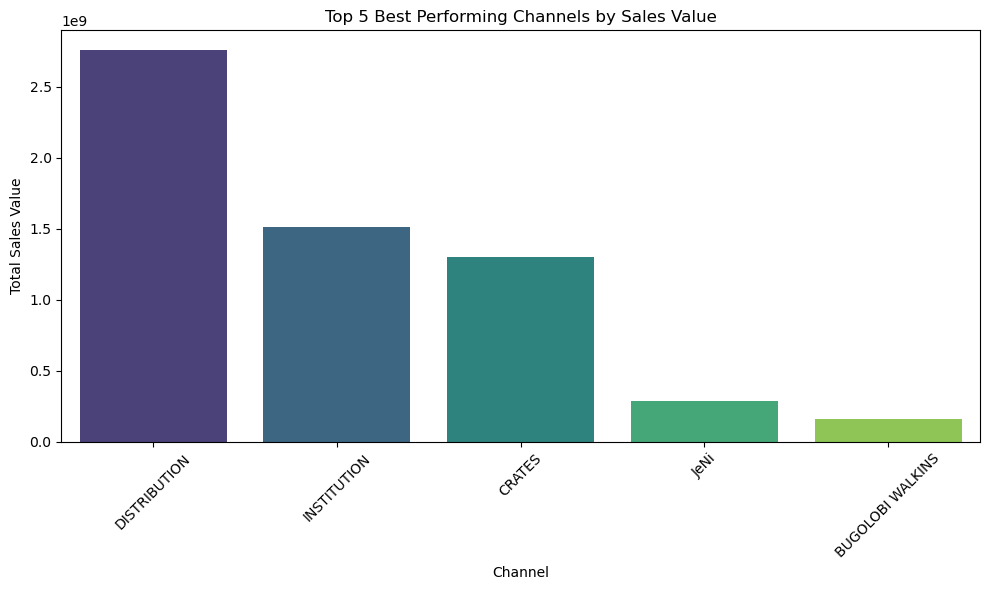

In [52]:
# Sort by sales value and select the top 5 channels 
channel_sales = transactions.groupby('Channel')['Sales Value'].sum().reset_index()

# Sort the Channels by total sales value and select the top 5
top_5_channels = channel_sales.nlargest(5, 'Sales Value')

# Plotting the top 5 products
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Sales Value', data=top_5_channels, palette='viridis')
plt.title('Top 5 Best Performing Channels by Sales Value')
plt.xlabel('Channel')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

5. What are the best performing Channels? 

6. What are the best-performing Sales Employees?

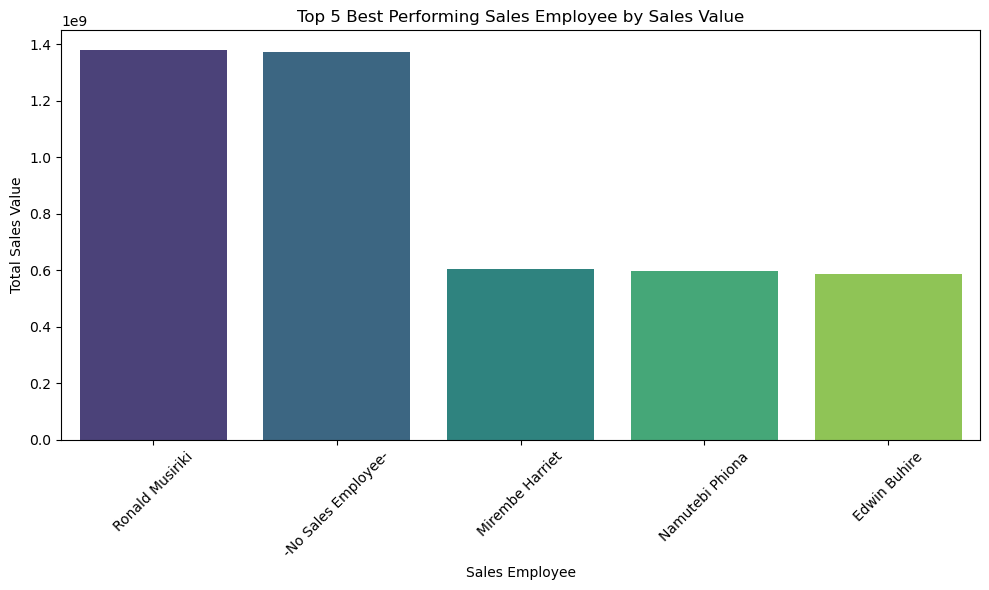

In [54]:
# Sort by sales value and select the top 5 sales employee 
sales_employee_sales = transactions.groupby('Sales Employee Name')['Sales Value'].sum().reset_index()

# Sort the Sales Employee by total sales value and select the top 5
top_5_sales_employee = sales_employee_sales.nlargest(5, 'Sales Value')

# Plotting the top 5 products
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Employee Name', y='Sales Value', data=top_5_sales_employee, palette='viridis')
plt.title('Top 5 Best Performing Sales Employee by Sales Value')
plt.xlabel('Sales Employee')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

What are the best-performing Sales Employees?

7. What are the best performing BP? (Rationale: To do our best to keep our best Customers)

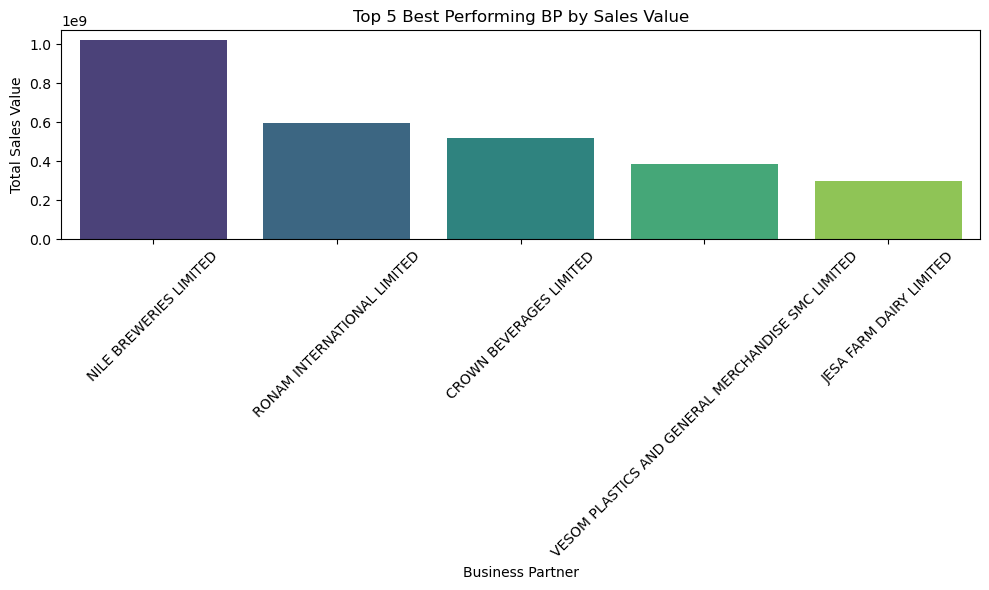

In [58]:
# Sort by sales value and select the top 5 BPs 
bp_sales = transactions.groupby('BP Name')['Sales Value'].sum().reset_index()

# Sort the BP by total sales value and select the top 5
top_5_bps = bp_sales.nlargest(5, 'Sales Value')

# Plotting the top 5 BPs
plt.figure(figsize=(10, 6))
sns.barplot(x='BP Name', y='Sales Value', data=top_5_bps, palette='viridis')
plt.title('Top 5 Best Performing BP by Sales Value')
plt.xlabel('Business Partner')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

What are the best performing BP? (Rationale: To do our best to keep our best Customers)

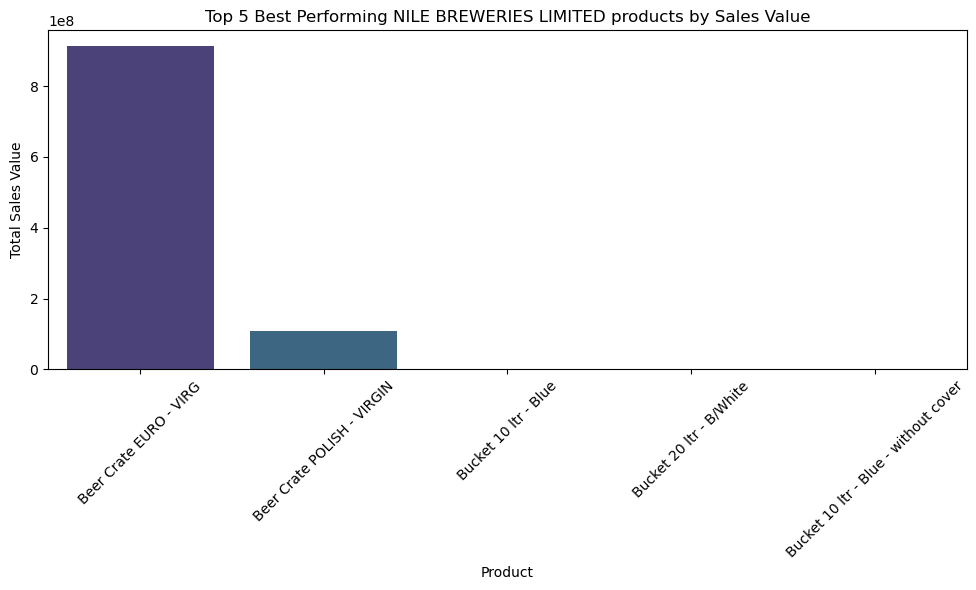

In [59]:
# Filter out rows where the BP is "NILE BREWERIES LIMITED"
filtered_df = transactions[transactions['BP Name'] == 'NILE BREWERIES LIMITED']

# Group by products and sum the sales_value
products_sales = filtered_df.groupby('Item Description')['Sales Value'].sum().reset_index()

# Sort by sales_value and select the top 5 regions
top_5_products = products_sales.nlargest(5, 'Sales Value')

# Step 4: Plotting the top 5 subcategories
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Description', y='Sales Value', data=top_5_products, palette='viridis')
plt.title('Top 5 Best Performing NILE BREWERIES LIMITED products by Sales Value')
plt.xlabel('Product')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()